# **`Computer vision`**

In [16]:
!unzip "/content/drive/MyDrive/Datasets/data.zip" -d "/content/output_folder/"

Archive:  /content/drive/MyDrive/Datasets/data.zip
replace /content/output_folder/data/submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/output_folder/data/test/image_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/output_folder/data/test/image_2.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/output_folder/data/test/image_3.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/output_folder/data/test/image_4.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/output_folder/data/test/image_5.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/output_folder/data/train/broken_grain_1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/output_folder/data/train/broken_grain_2.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: nn
replace /content/output_folder/data/train/broken_grain_3.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/output_folder/data/train/full_grain_1.jpg? [y]es, [n]o, [A]ll, 

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [31]:
image="/content/output_folder/data/train/mixed_grain_1.jpg"
img = cv2.imread(image)

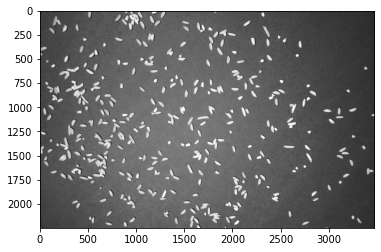

In [19]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

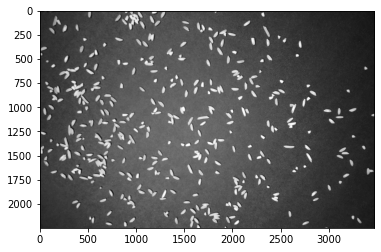

In [20]:
blur = cv2.GaussianBlur(gray, (11, 11), 0)
plt.imshow(blur, cmap='gray')

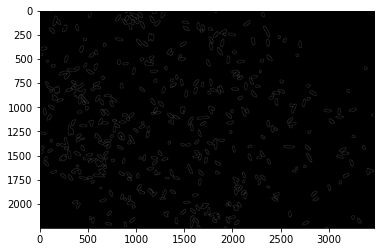

In [21]:
canny = cv2.Canny(blur, 30, 150, 3)
plt.imshow(canny, cmap='gray')

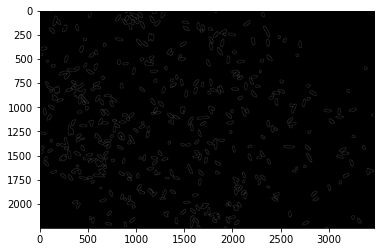

In [22]:
dilated = cv2.dilate(canny, (1, 1), iterations=0)
plt.imshow(dilated, cmap='gray')

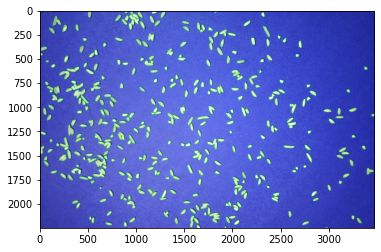

In [23]:
(cnt, hierarchy) = cv2.findContours(
    dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)
 
plt.imshow(rgb)

In [24]:
contours, hierarchy = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Store the bounding rectangles here:
rectanglesList = []

# Look for the outer bounding boxes (no children):
count=0
for _, c in enumerate(contours):

    # Get blob area:
    currentArea = cv2.contourArea(c)
    # Set a min area threshold:
    minArea = 50

    if currentArea > minArea:

        # Approximate the contour to a polygon:
        contoursPoly = cv2.approxPolyDP(c, 3, True)
        # Get the polygon's bounding rectangle:
        boundRect = cv2.boundingRect(contoursPoly)

        # Store rectangles in list:
        rectanglesList.append(boundRect)

        # Get the dimensions of the bounding rect:
        rectX = boundRect[0]
        rectY = boundRect[1]
        rectWidth = boundRect[2]
        rectHeight = boundRect[3]
        riw=[]
        col=[]
        

        riw.append(rectWidth)
        col.append(rectHeight)
        
        # Set bounding rect:
        color = (0, 0, 255)
        cv2.rectangle( img, (int(rectX), int(rectY)),
                   (int(rectX + rectWidth), int(rectY + rectHeight)), color, 2 )
        
        if((rectWidth*rectHeight)< 3445.0):
          count+=1

print(count)
cv2.waitKey(0)

207


-1

In [25]:
np.mean(col)*np.mean(riw)

3445.0

In [26]:
print("Total grains in the image : ", len(cnt))

Total grains in the image :  421


In [27]:
print("Broken ",count)
print("Full grains",len(cnt)-count)

Broken  207
Full grains 214


# **`Submission csv`**

In [32]:
import pandas as pd 
submission=pd.read_csv("/content/submission.csv")

In [48]:
submission

,file_name,total_rice_grain,total_broken_rice_grain
0,image_1.jpg,663.0,239.0
1,image_2.jpg,727.0,258.0
2,image_3.jpg,708.0,254.0
3,image_4.jpg,797.0,377.0
4,image_5.jpg,860.0,131.0


In [47]:
img_dir='/content/output_folder/data/test'

for i in range(1,6):
  image=img_dir+"/image_"+str(i)+".jpg"
  img = cv2.imread(image)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  blur = cv2.GaussianBlur(gray, (11, 11), 0)
  canny = cv2.Canny(blur, 30, 150, 3)
  dilated = cv2.dilate(canny, (1, 1), iterations=0)
  contours, hierarchy = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  rectanglesList = []
  count=0
  
  for _, c in enumerate(contours):

      currentArea = cv2.contourArea(c)
      minArea = 50

      if currentArea > minArea:
          contoursPoly = cv2.approxPolyDP(c, 3, True)
          boundRect = cv2.boundingRect(contoursPoly)
          rectanglesList.append(boundRect)
          rectX = boundRect[0]
          rectY = boundRect[1]
          rectWidth = boundRect[2]
          rectHeight = boundRect[3]
          riw=[]
          col=[]
          

          riw.append(rectWidth)
          col.append(rectHeight)
          color = (0, 0, 255)
          cv2.rectangle( img, (int(rectX), int(rectY)),
                    (int(rectX + rectWidth), int(rectY + rectHeight)), color, 2 )
          
          if((rectWidth*rectHeight)< 3445.0):
            count+=1
  submission['total_broken_rice_grain'][i-1]=count
  submission['total_rice_grain'][i-1]=len(contours)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [49]:
submission

,file_name,total_rice_grain,total_broken_rice_grain
0,image_1.jpg,663.0,239.0
1,image_2.jpg,727.0,258.0
2,image_3.jpg,708.0,254.0
3,image_4.jpg,797.0,377.0
4,image_5.jpg,860.0,131.0


In [50]:
submission.to_csv('/content/rice_grain_submission.csv', index=False)